In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rc('font', family='NanumGothic')
plt.style.use('ggplot')

In [35]:
member = pd.read_csv('member_data.csv')
product1 = pd.read_csv('product_data_01.csv')
product2 = pd.read_csv('product_data_02.csv')
product3 = pd.read_csv('product_data_03.csv')
product4 = pd.read_csv('product_data_04.csv')

# 제품정보 통합

In [36]:
product = pd.concat([product1, product2, product3, product4], axis=0)

In [8]:
product.to_csv('product.csv', encoding='utf-8')

# 요일 생성

In [37]:
product['공급일자'] = pd.to_datetime(product['공급일자'])

In [38]:
product['요일'] = product['공급일자'].dt.day_name()

# 주차 생성

In [40]:
product['주차'] = product['공급일자'].dt.weekofyear

# 주중 생성

In [42]:
product['주중'] = '주중'

In [43]:
product.loc[product['요일'] == 'Saturday', '주중'] = '주말'

In [44]:
product.loc[product['요일'] == 'Sunday', '주중'] = '주말'

# 연령대 생성
15 ~ 24  
25 ~ 34  
35 ~ 44  
45 ~ 54  
55 ~ 64  
65 이상

In [46]:
member['연령대'] = '15 ~ 24'

member.loc[(member['연령'] >= 26) & (member['연령'] <= 35), '연령대'] = '25 ~ 34'
member.loc[(member['연령'] >= 36) & (member['연령'] <= 45), '연령대'] = '35 ~ 44'
member.loc[(member['연령'] >= 46) & (member['연령'] <= 55), '연령대'] = '45 ~ 54'
member.loc[(member['연령'] >= 56) & (member['연령'] <= 65), '연령대'] = '55 ~ 64'
member.loc[(member['연령'] > 65), '연령대'] = '65 이상'

# 구 생성

In [47]:
member['구'] = member['주소'].str.partition('-').loc[:, 0]

# 계절 생성

12 ~ 2 : 겨울  
3 ~ 5 : 봄  
6 ~ 8 : 여름  
9 ~ 11 : 가을

In [48]:
product['계절'] = '여름'

product.loc[product['공급일자'].dt.month == 1, '계절'] = '겨울'
product.loc[product['공급일자'].dt.month == 2, '계절'] = '겨울'
product.loc[product['공급일자'].dt.month == 3, '계절'] = '봄'
product.loc[product['공급일자'].dt.month == 4, '계절'] = '봄'
product.loc[product['공급일자'].dt.month == 5, '계절'] = '봄'
product.loc[product['공급일자'].dt.month == 9, '계절'] = '가을'
product.loc[product['공급일자'].dt.month == 10, '계절'] = '가을'

# 아침, 점심, 저녁
가게 운영 시간은 오전 8시부터 오후 9시까지

08 ~ 12 아침  
13 ~ 17 점심  
18 ~ 20 저녁

In [49]:
product['구매시간대'] = '아침'

product.loc[product['구매시각'].str.partition(':')[0] == '13', '구매시간대'] = '점심'
product.loc[product['구매시각'].str.partition(':')[0] == '14', '구매시간대'] = '점심'
product.loc[product['구매시각'].str.partition(':')[0] == '15', '구매시간대'] = '점심'
product.loc[product['구매시각'].str.partition(':')[0] == '16', '구매시간대'] = '점심'
product.loc[product['구매시각'].str.partition(':')[0] == '17', '구매시간대'] = '점심'
product.loc[product['구매시각'].str.partition(':')[0] == '18', '구매시간대'] = '저녁'
product.loc[product['구매시각'].str.partition(':')[0] == '19', '구매시간대'] = '저녁'
product.loc[product['구매시각'].str.partition(':')[0] == '20', '구매시간대'] = '저녁'

# 반품 횟수
고객 데이터에 반품횟수를 추가해야함

In [51]:
temp = pd.DataFrame(product.loc[product['구매수량'] < 0].groupby('회원번호').count()['물품명']).reset_index()

In [52]:
temp.columns = ['회원번호', '반품횟수']

In [54]:
member = pd.merge(member, temp, how='left', on='회원번호')

In [55]:
member['반품횟수'] = member['반품횟수'].fillna(0)

In [87]:
member['반품횟수'] = member['반품횟수'].astype('int')

# 방문 횟수

In [56]:
from collections import Counter

In [57]:
temp2 = pd.pivot_table(index=['공급일자', '회원번호'], aggfunc='count', data=product).reset_index()['회원번호']

In [60]:
member = pd.merge(member, pd.Series(Counter(temp2), name='방문횟수'), how='left', left_on='회원번호', right_index=True)

In [100]:
member.loc[member['반품횟수'] >= 1, '회원번호']

4        1000281920
10       1000796032
30        100224000
51       1005729280
64       1006334336
            ...    
11522     998526144
11533      99912192
11536     999227712
11539     999474560
11551     999721408
Name: 회원번호, Length: 1670, dtype: int64

In [65]:
temp3 = pd.pivot_table(index='회원번호', aggfunc='sum', values='구매금액', data=product).reset_index()

In [66]:
temp3

,회원번호,구매금액
0,18613824,21059
1,18764160,-88827
2,18792000,33311
3,18942336,560920
4,18949760,2776
...,...,...
11550,1644772352,85000
11551,1644957952,25079
11552,1670400000,13060734
11553,1670606016,129223


In [68]:
pd.merge(member, temp3, on='회원번호')

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,반품횟수,방문횟수,구매금액
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,55 ~ 64,수지구,0.0,1,7658
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,25 ~ 34,처인구,0.0,1,36948
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,35 ~ 44,광주,0.0,15,142831
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,65 이상,수지구,0.0,4,138892
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,35 ~ 44,수지구,2.0,28,592543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,45 ~ 54,수지구,0.0,1,39246
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,35 ~ 44,수지구,1.0,3,39820
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,65 이상,수지구,0.0,9,152960
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,35 ~ 44,수지구,0.0,21,641334


In [27]:
product[product['회원번호'] == 1670400000]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
1362,2018-01-04,1670400000,탈퇴,음료,음료,과즙,사과당근즙(150ml),5.0,10529,매장C,NaN,17:42
1722,2018-01-05,1670400000,탈퇴,채소,버섯,만가닥버섯,만가닥버섯모음(300g),1.0,6528,매장C,NaN,16:51
1960,2018-01-05,1670400000,탈퇴,축산물,중량(정육),한우(중량),꽃등심로스-성남용인,1.0,35063,매장C,NaN,16:51
2706,2018-01-08,1670400000,탈퇴,건강,건강일반,추출/농축액,쌍화차(70ml),7.0,38327,매장C,NaN,15:17
3030,2018-01-08,1670400000,탈퇴,축산물,알,유정란,동물복지유정란/중란(10알/국내산),1.0,6107,매장C,NaN,15:43
...,...,...,...,...,...,...,...,...,...,...,...,...
51028,2018-10-22,1670400000,탈퇴,채소,버섯,표고버섯,말린표고버섯(150g),1.0,19048,매장A,NaN,15:06
51046,2018-10-22,1670400000,탈퇴,건강,건강일반,건강차,건여주(100g),1.0,19718,매장A,NaN,15:06
51871,2018-10-27,1670400000,탈퇴,수산,해조,미역/다시마,다시마(200g),1.0,7658,매장A,NaN,12:19
51929,2018-10-27,1670400000,탈퇴,채소,버섯,팽이버섯,팽이버섯(150g),1.0,1149,매장A,NaN,12:19


In [28]:
member[member['회원번호'] == 1670400000]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,방문횟수
4502,1670400000,탈퇴,기타-비조합원,남,36.0,미신청,수신,normal,281


In [29]:
pt = pd.pivot_table(index='회원번호', aggfunc='sum', values='구매금액', data=product)

In [30]:
product.set_index('회원번호').loc[pt[pt['구매금액'] < 0].index]

,공급일자,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
회원번호,,,,,,,,,,,
18764160,2018-04-28,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059,매장D,NaN,18:58
18764160,2018-05-03,정상회원,간식,과자,스낵,오징어땅콩볼(100g),1.0,4595,매장D,NaN,12:40
18764160,2018-05-14,정상회원,건강,건강일반,추출/농축액,흑염소진액(100ml*30봉),-1.0,-166554,매장D,20180514.0,16:31
18764160,2018-06-24,정상회원,간식,식사대용,식사대용/기타,소불고기볶음밥(300g),1.0,9381,매장D,NaN,15:14
18764160,2018-07-13,정상회원,채소,과일채소,메론,메론_머스크/중(1.5~2kg:1통),1.0,14550,매장D,NaN,19:03
...,...,...,...,...,...,...,...,...,...,...,...
1607535424,2018-07-25,정상회원,축산물,소,한우(냉장),한우등심(안심대안/300g/신선육),-1.0,-38480,매장D,20180725.0,17:55
1607535424,2018-07-27,정상회원,채소,열매채소,오이,오이(3개),1.0,4020,매장D,NaN,18:44
1607535424,2018-07-27,정상회원,간식,빵,"식빵, 식사대용",우유식빵(180g)/매장,1.0,4977,매장D,NaN,18:44


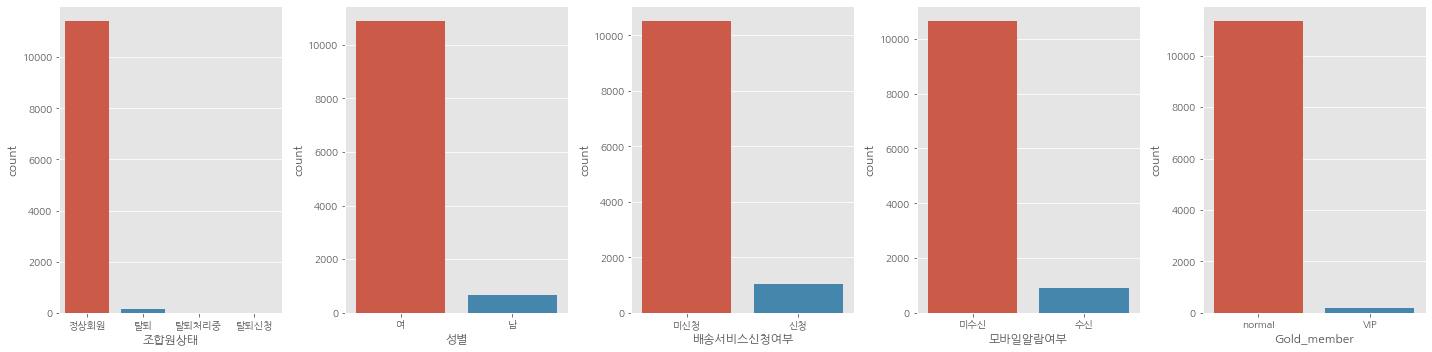

In [28]:
plt.figure(figsize=(20,5))
for i, col in enumerate(['조합원상태', '성별', '배송서비스신청여부', '모바일알람여부', 'Gold_member']):
    sns.countplot(x=col, data=member, ax=plt.subplot(1, 5, i+1))
plt.tight_layout()

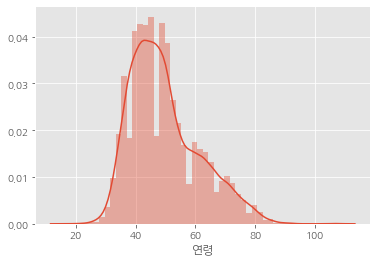

In [29]:
sns.distplot(member['연령'])

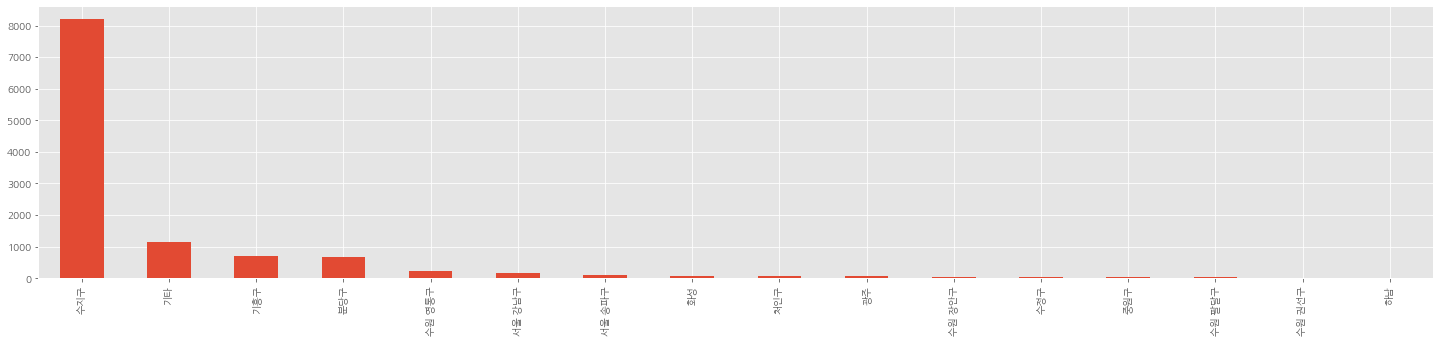

In [30]:
member['구'].value_counts().plot(kind='bar', figsize=(25,5))

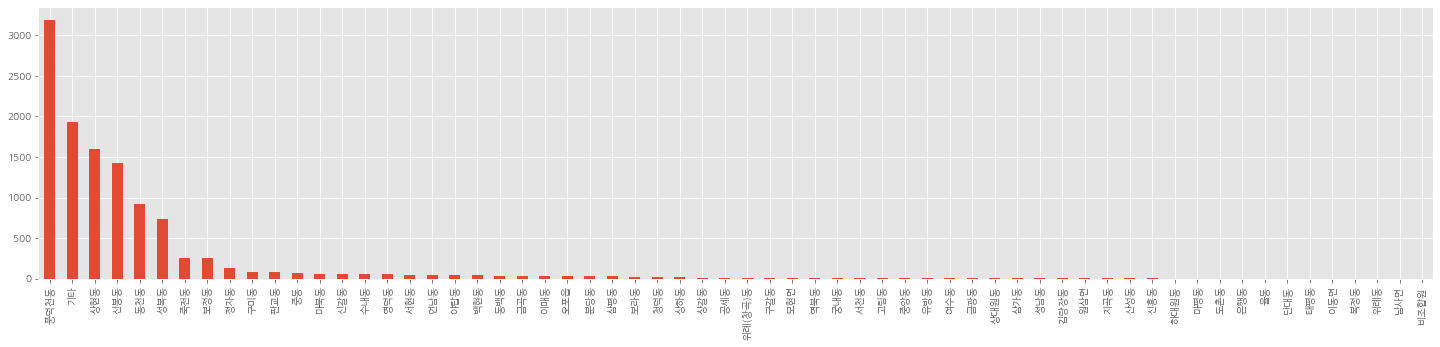

In [31]:
member['동'].value_counts().plot(kind='bar', figsize=(25,5))

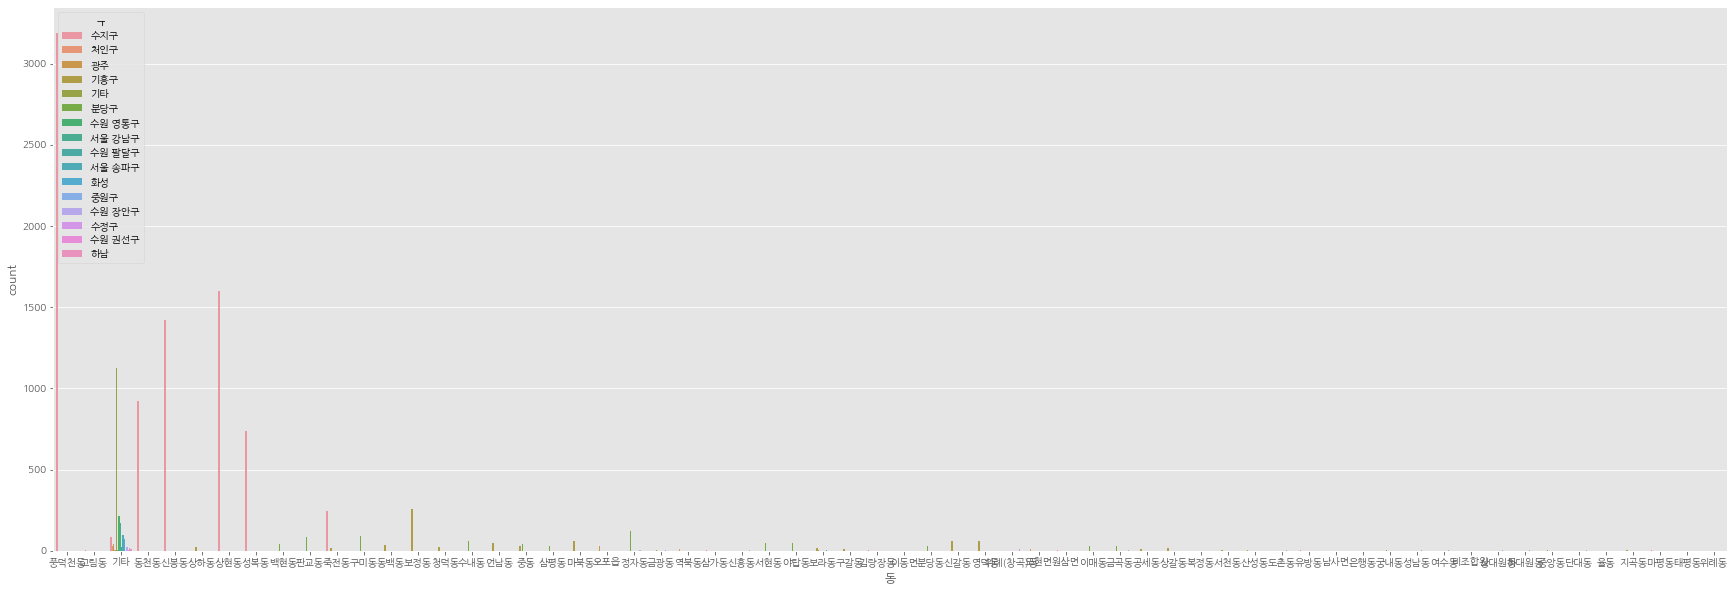

In [42]:
plt.figure(figsize=(30,10))
sns.countplot(x='동', hue='구', data=member)

In [46]:
pd.pivot_table(data=member, index=['구', '동'], aggfunc='count', values='성별').T

구   광주          기타                            ... 처인구                      하남  \
동   기타 산성동 오포읍 궁내동 금곡동 금광동    기타 동백동 동천동 보라동  ... 모현면 삼가동 역북동 원삼면 유방동 이동면  기타   
성별  39  3   31  1   1   2   1124  1   1   5   ...  9   5   9   4   5   1   13   

구       화성      
동  위례동  기타 보라동  
성별  1   75  3   

[1 rows x 95 columns]

In [50]:
member.loc[member['성별'].isnull()]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구,동
3666,1527053696,정상회원,기타-기타,NaN,45.0,미신청,.,normal,기타,기타
7098,545864448,정상회원,기타-기타,NaN,NaN,미신청,.,normal,기타,기타


In [51]:
member.loc[member['연령'].isnull()]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구,동
5983,383599936,정상회원,기타-기타,여,NaN,미신청,.,normal,기타,기타
7098,545864448,정상회원,기타-기타,NaN,NaN,미신청,.,normal,기타,기타


In [87]:
member[member['주소'].str.contains('기타')]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구,동
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,광주,기타
9,1000577024,정상회원,기타-기타,여,47.0,미신청,.,normal,기타,기타
24,1001776000,정상회원,기타-기타,남,57.0,미신청,.,normal,기타,기타
32,1003019520,정상회원,기타-기타,여,72.0,미신청,.,normal,기타,기타
33,1003088192,정상회원,기타-기타,여,66.0,미신청,.,normal,기타,기타
...,...,...,...,...,...,...,...,...,...,...
11519,998470464,정상회원,기타-기타,여,42.0,미신청,.,normal,기타,기타
11524,998583680,정상회원,서울 강남구-기타,여,43.0,미신청,.,normal,서울 강남구,기타
11538,999398464,정상회원,기타-기타,여,54.0,미신청,.,normal,기타,기타
11539,999474560,정상회원,기타-기타,여,40.0,미신청,.,normal,기타,기타


In [86]:
member[~member['주소'].str.contains('기타')]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구,동
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,수지구,풍덕천동
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,처인구,고림동
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,수지구,동천동
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,수지구,풍덕천동
5,1000330176,정상회원,수지구-신봉동,여,64.0,미신청,.,normal,수지구,신봉동
...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,수지구,동천동
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,수지구,동천동
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,수지구,성복동
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,수지구,상현동


In [99]:
product1['구매매장'].value_counts()

매장C    123191
Name: 구매매장, dtype: int64

In [98]:
product1[product1['구매수량'] == 0]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
2174,2018-01-06,675322304,정상회원,간식,빵,"찐빵,호떡,전통",쑥찐빵(400g/5개)/매장,0.0,0,매장C,NaN,10:41
7149,2018-01-18,443533888,정상회원,간식,빵,"케이크,롤,선물",녹차롤케이크(420g),0.0,0,매장C,NaN,10:57
10537,2018-01-26,561061376,정상회원,서류,감자,감자,감자/소(1kg),0.0,0,매장C,NaN,16:49
17334,2018-02-10,584450688,정상회원,과실,과일,사과,사과/(2kg)/대,0.0,0,매장C,NaN,14:08
20327,2018-02-19,572427520,정상회원,채소,뿌리채소,더덕,더덕(500g/무),0.0,0,매장C,NaN,11:53
41721,2018-04-12,840476608,정상회원,서류,감자,겨울감자,제주감자(500g),0.0,0,매장C,NaN,12:46
41966,2018-04-13,781359296,정상회원,채소,뿌리채소,연근,통연근(400g),0.0,0,매장C,NaN,10:33
43008,2018-04-16,657703296,정상회원,축산물,알,유정란,동물복지유정란(15알/국내산),0.0,0,매장C,NaN,11:32
49747,2018-05-02,1434231424,정상회원,반찬,두부/유부,두부,찌개용두부(420g),0.0,0,매장C,NaN,19:56
50911,2018-05-06,919204416,정상회원,채소,버섯,목이버섯,목이버섯(200g),0.0,0,매장C,NaN,15:03


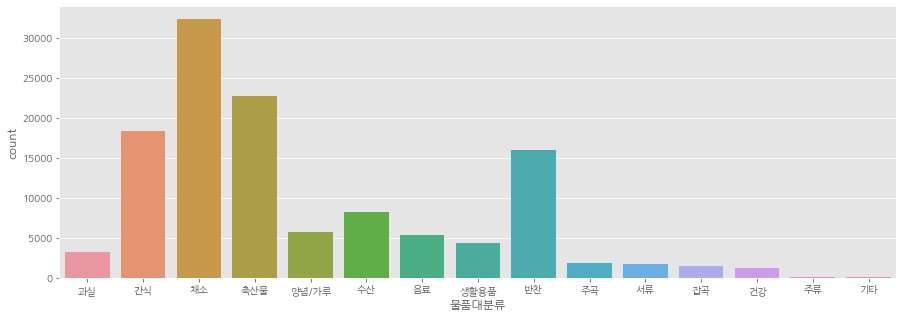

In [57]:
plt.figure(figsize=(15,5))
sns.countplot('물품대분류', data=product1)

[]

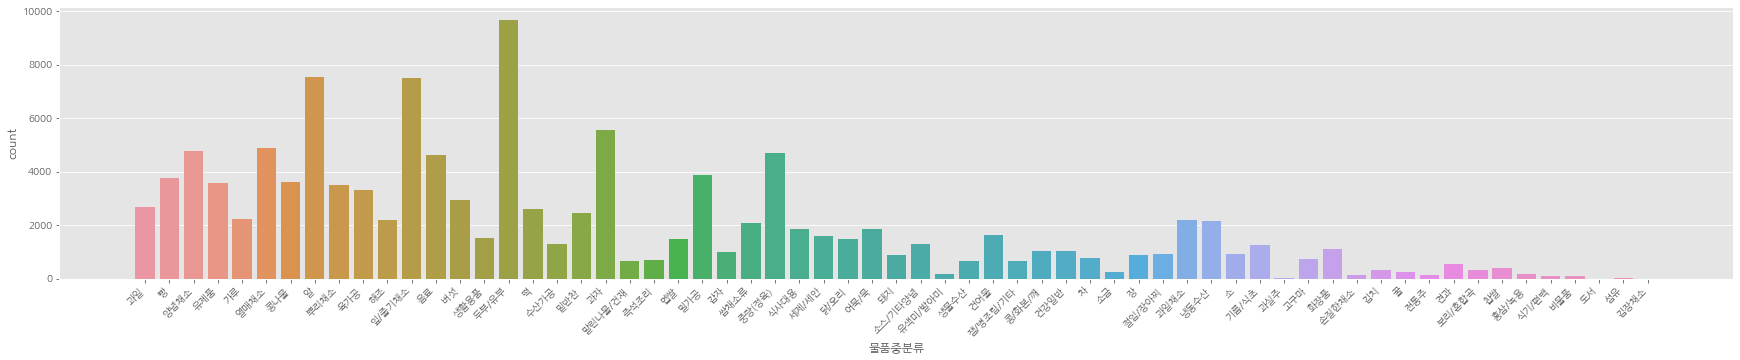

In [66]:
plt.figure(figsize=(30,5))
g = sns.countplot('물품중분류', data=product1)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.plot()

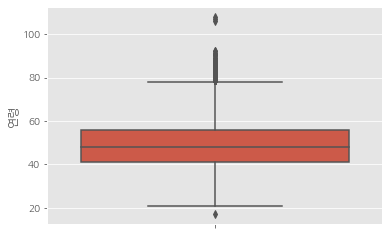

In [69]:
sns.boxplot(y = '연령', data=member)

In [72]:
member.loc[member['연령'] < 20]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구,동
4091,1575020160,정상회원,수지구-풍덕천동,여,17.0,미신청,.,normal,수지구,풍덕천동


In [75]:
member.loc[member['연령'] > 90]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구,동
1418,1186067520,정상회원,수지구-풍덕천동,여,91.0,미신청,수신,normal,수지구,풍덕천동
2135,1281712768,정상회원,기타-기타,여,92.0,미신청,.,normal,기타,기타
3414,149426560,정상회원,수지구-신봉동,여,92.0,미신청,.,VIP,수지구,신봉동
4504,1670620864,정상회원,분당구-수내동,남,108.0,미신청,.,normal,분당구,수내동
4641,18792000,정상회원,기타-기타,남,91.0,미신청,.,normal,기타,기타
7797,623725504,정상회원,기타-기타,여,107.0,미신청,.,normal,기타,기타
8312,682840960,정상회원,수지구-풍덕천동,여,91.0,미신청,.,normal,수지구,풍덕천동
8532,70698752,정상회원,수지구-신봉동,여,91.0,미신청,.,normal,수지구,신봉동
8823,742461248,정상회원,분당구-정자동,남,106.0,미신청,.,normal,분당구,정자동


In [95]:
product1.loc[product1['회원번호'] == 1670620864]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각


In [96]:
product2.loc[product2['회원번호'] == 1670620864]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각


In [97]:
product3.loc[product3['회원번호'] == 1670620864]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
19643,2018-04-04,1670620864,정상회원,과실,과일,사과,사과/(5kg)/중,1.0,47095,매장B,NaN,18:31
20063,2018-04-06,1670620864,정상회원,간식,밀가공,간편조리면,스파게티(620g/2인분),1.0,15124,매장B,NaN,17:35
21343,2018-04-12,1670620864,정상회원,양념/가루,가루,고춧가루,고춧가루(토종/300g),2.0,56284,매장B,NaN,13:40
21698,2018-04-14,1670620864,정상회원,음료,차,잎꽃차,국화차(0.6g*20티백),1.0,22016,매장B,NaN,17:31
22841,2018-04-19,1670620864,정상회원,생활용품,생활용품,숯/원예,다용도미생물(1ℓ),1.0,9381,매장B,NaN,18:44
22896,2018-04-19,1670620864,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829,매장B,NaN,18:49
23014,2018-04-20,1670620864,정상회원,간식,식사대용,죽,팥죽(230g),2.0,8041,매장B,NaN,19:03
23060,2018-04-20,1670620864,정상회원,채소,잎/줄기채소,아스파라거스,아스파라거스(150g),1.0,7945,매장B,NaN,19:03
23088,2018-04-20,1670620864,정상회원,수산,수산가공,젓갈/액젓,참새우젓(500g),1.0,17038,매장B,NaN,19:59
23117,2018-04-20,1670620864,정상회원,간식,빵,단과자빵,유자피낭시에(90g:3개)/매장,1.0,4403,매장B,NaN,19:03


In [106]:
member['연령'].value_counts().index

Float64Index([ 42.0,  48.0,  45.0,  46.0,  40.0,  43.0,  50.0,  44.0,  49.0,
               39.0,  41.0,  47.0,  38.0,  51.0,  37.0,  52.0,  36.0,  53.0,
               54.0,  35.0,  55.0,  59.0,  34.0,  58.0,  57.0,  62.0,  60.0,
               56.0,  63.0,  61.0,  64.0,  66.0,  67.0,  65.0,  33.0,  70.0,
               69.0,  72.0,  71.0,  68.0,  73.0,  32.0,  75.0,  74.0,  76.0,
               77.0,  31.0,  78.0,  79.0,  80.0,  82.0,  30.0,  81.0,  85.0,
               28.0,  29.0,  83.0,  26.0,  27.0,  84.0,  86.0,  91.0,  87.0,
               25.0,  92.0,  88.0,  89.0,  24.0,  23.0,  22.0, 106.0,  17.0,
               21.0, 108.0, 107.0,  90.0],
             dtype='float64')

In [108]:
product1.loc[product1['구매수량'] < 0]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
129,2018-01-02,742641280,정상회원,간식,밀가공,만두,고기만두(500g),-1.0,-10338,매장C,20180102.0,18:25
136,2018-01-02,978221504,정상회원,채소,뿌리채소,월동무,월동무(1.2kg이상),-1.0,-3733,매장C,20180102.0,19:55
196,2018-01-02,742641280,정상회원,축산물,돼지,보리살림돼지,불고기용(600g/우리보리살림돼지),-1.0,-16847,매장C,20180102.0,18:25
197,2018-01-02,742641280,정상회원,채소,잎/줄기채소,시금치,시금치(300g),-1.0,-4403,매장C,20180102.0,18:25
258,2018-01-02,742641280,정상회원,양념/가루,기름/식초,기름,참기름(330ml),-1.0,-48052,매장C,20180102.0,18:25
...,...,...,...,...,...,...,...,...,...,...,...,...
122828,2018-10-30,58037120,정상회원,반찬,어묵/묵,묵,청포묵(420g),-1.0,-7849,매장C,20181030.0,15:58
122831,2018-10-30,381879424,정상회원,반찬,밑반찬,무침,무말림무침(200g),-1.0,-8806,매장C,20181030.0,18:48
122933,2018-10-31,1479170752,정상회원,수산,생물수산,패류/갑각류,생굴(450g),-1.0,-32162,매장C,20181031.0,11:14
123155,2018-10-31,1330007744,정상회원,채소,양념채소,마늘/재래종,재래종마늘/한지형/유(대:500g),-1.0,-17613,매장C,NaN,16:53
